<a href="https://colab.research.google.com/github/suyash-jamdade/API/blob/master/REST_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Determination of how well the Golden State Warriors performed against the Toronto Raptors.**

In [1]:
!pip install nba_api

     |████████████████████████████████| 225kB 2.7MB/s 


In [0]:
def one_dict(list_dict):
    keys=list_dict[0].keys()
    out_dict={key:[] for key in keys}
    for dict_ in list_dict:
        for key, value in dict_.items():
            out_dict[key].append(value)
    return out_dict 

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
dict_={'a':[11,21,31],'b':[12,22,32]}

In [5]:
df=pd.DataFrame(dict_)
type(df)

pandas.core.frame.DataFrame

In [6]:
df.head()

a   b
0  11  12
1  21  22
2  31  32

In [7]:
df.mean()

a    21.0
b    22.0
dtype: float64

In [0]:
from nba_api.stats.static import teams
import matplotlib.pyplot as plt


In [0]:
nba_teams = teams.get_teams()

In [13]:
nba_teams[0:3]

[{'abbreviation': 'ATL',
  'city': 'Atlanta',
  'full_name': 'Atlanta Hawks',
  'id': 1610612737,
  'nickname': 'Hawks',
  'state': 'Atlanta',
  'year_founded': 1949},
 {'abbreviation': 'BOS',
  'city': 'Boston',
  'full_name': 'Boston Celtics',
  'id': 1610612738,
  'nickname': 'Celtics',
  'state': 'Massachusetts',
  'year_founded': 1946},
 {'abbreviation': 'CLE',
  'city': 'Cleveland',
  'full_name': 'Cleveland Cavaliers',
  'id': 1610612739,
  'nickname': 'Cavaliers',
  'state': 'Ohio',
  'year_founded': 1970}]

In [14]:
dict_nba_team=one_dict(nba_teams)
df_teams=pd.DataFrame(dict_nba_team)
df_teams.head()

id             full_name  ...          state year_founded
0  1610612737         Atlanta Hawks  ...        Atlanta         1949
1  1610612738        Boston Celtics  ...  Massachusetts         1946
2  1610612739   Cleveland Cavaliers  ...           Ohio         1970
3  1610612740  New Orleans Pelicans  ...      Louisiana         2002
4  1610612741         Chicago Bulls  ...       Illinois         1966

[5 rows x 7 columns]

In [15]:
df_warriors=df_teams[df_teams['nickname']=='Warriors']
df_warriors

id              full_name  ...       state year_founded
7  1610612744  Golden State Warriors  ...  California         1946

[1 rows x 7 columns]

In [16]:
id_warriors=df_warriors[['id']].values[0][0]
#we now have an integer that can be used   to request the Warriors information 
id_warriors

1610612744

In [0]:
from nba_api.stats.endpoints import leaguegamefinder

In [0]:
#gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=id_warriors)

In [0]:
#gamefinder.get_json()

In [0]:
# games = gamefinder.get_data_frames()[0]

In [18]:
! wget https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/PY0101EN/Chapter%205/Labs/Golden_State.pkl

--2020-04-16 21:12:21--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/PY0101EN/Chapter%205/Labs/Golden_State.pkl
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 811065 (792K) [application/octet-stream]
Saving to: ‘Golden_State.pkl’

Golden_State.pkl    100%[===================>] 792.06K  --.-KB/s    in 0.1s    

2020-04-16 21:12:21 (5.54 MB/s) - ‘Golden_State.pkl’ saved [811065/811065]



In [23]:
file_name = "Golden_State.pkl"
games = pd.read_pickle(file_name)
games.head()

SEASON_ID     TEAM_ID TEAM_ABBREVIATION  ...   TOV  PF PLUS_MINUS
0     22019  1610612744               GSW  ...  11.0  21        3.2
1     22019  1610612744               GSW  ...  20.0  20       -8.0
2     22019  1610612744               GSW  ...  13.0  22        8.0
3     22019  1610612744               GSW  ...  20.0  25       10.0
4     22019  1610612744               GSW  ...  13.0  15       -8.0

[5 rows x 28 columns]

In [0]:
games_home=games [games ['MATCHUP']=='GSW vs. TOR']
games_away=games [games ['MATCHUP']=='GSW @ TOR']

In [25]:
games_home.mean()['PLUS_MINUS']

3.730769230769231

In [26]:
games_away.mean()['PLUS_MINUS']

-0.6071428571428571

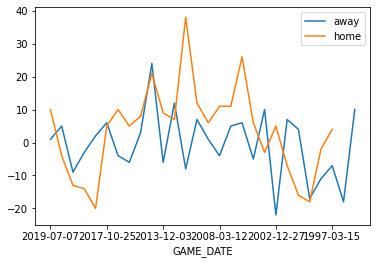

In [27]:
fig, ax = plt.subplots()

games_away.plot(x='GAME_DATE',y='PLUS_MINUS', ax=ax)
games_home.plot(x='GAME_DATE',y='PLUS_MINUS', ax=ax)
ax.legend(["away", "home"])
plt.show()